# Decision Tree Regression

In [76]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [77]:
DATA_PATH = 'data/'

data_train = pd.read_csv(f'{DATA_PATH}train.csv',sep='\t', index_col='index')
data_test = pd.read_csv(f'{DATA_PATH}test.csv', sep='\t', index_col='index')

In [78]:
target_list = ['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']

Деление выборок на обучающие признаки и целевые

In [79]:
data_train_marked = data_train.drop(columns=target_list)
target_train = data_train[target_list]

data_test_non_marked = data_test.drop(columns=target_list)
target_test = data_test[target_list]

In [80]:
params = {'n_estimators': 200,
          'criterion': 'mae',
          'max_depth': 300,
          'min_samples_split': 10,
          'max_features': 'sqrt',
          'n_jobs': 2,
          'random_state': 42}

In [81]:
forest_model = RandomForestRegressor()
forest_model.set_params(**params)
forest_model.fit(data_train_marked, target_train)

RandomForestRegressor(criterion='mae', max_depth=300, max_features='sqrt',
                      min_samples_split=10, n_estimators=200, n_jobs=2,
                      random_state=42)

In [82]:
pred = forest_model.predict(data_test_non_marked)

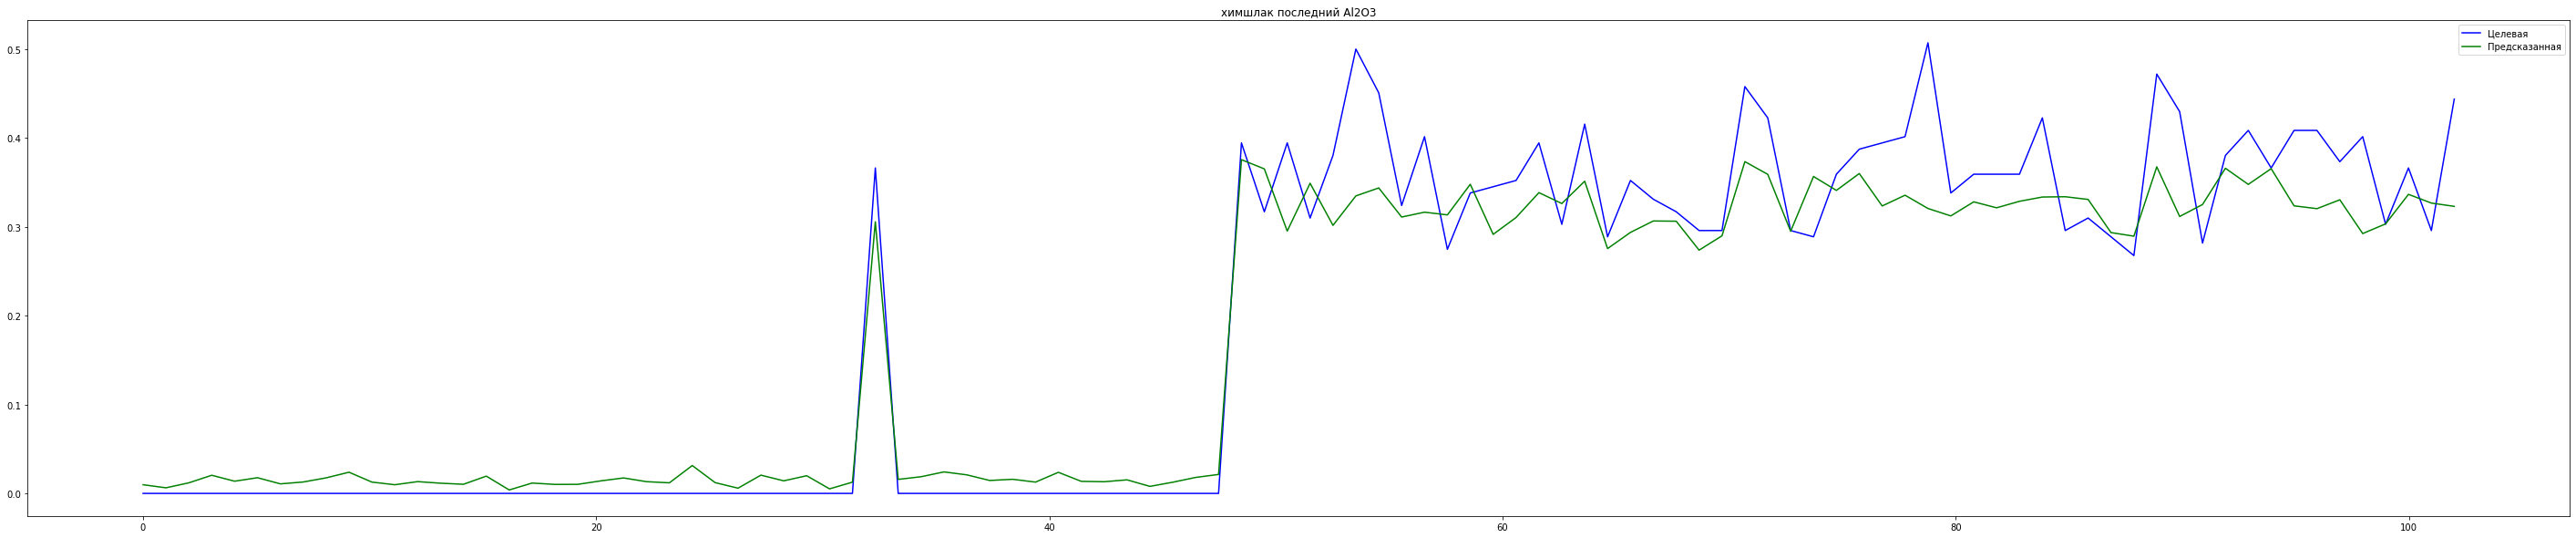

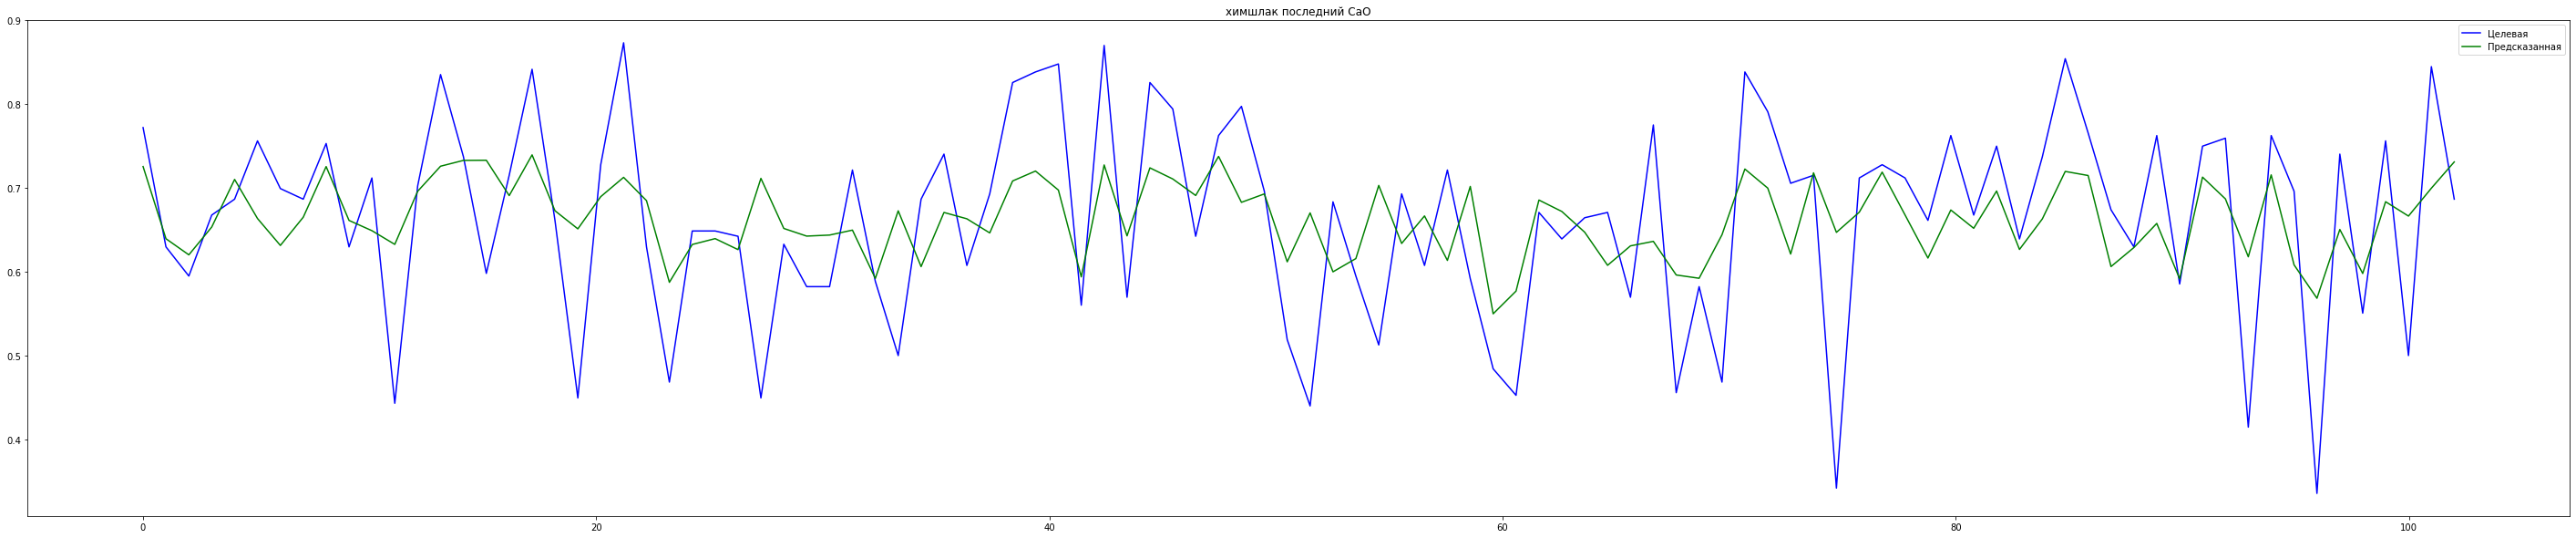

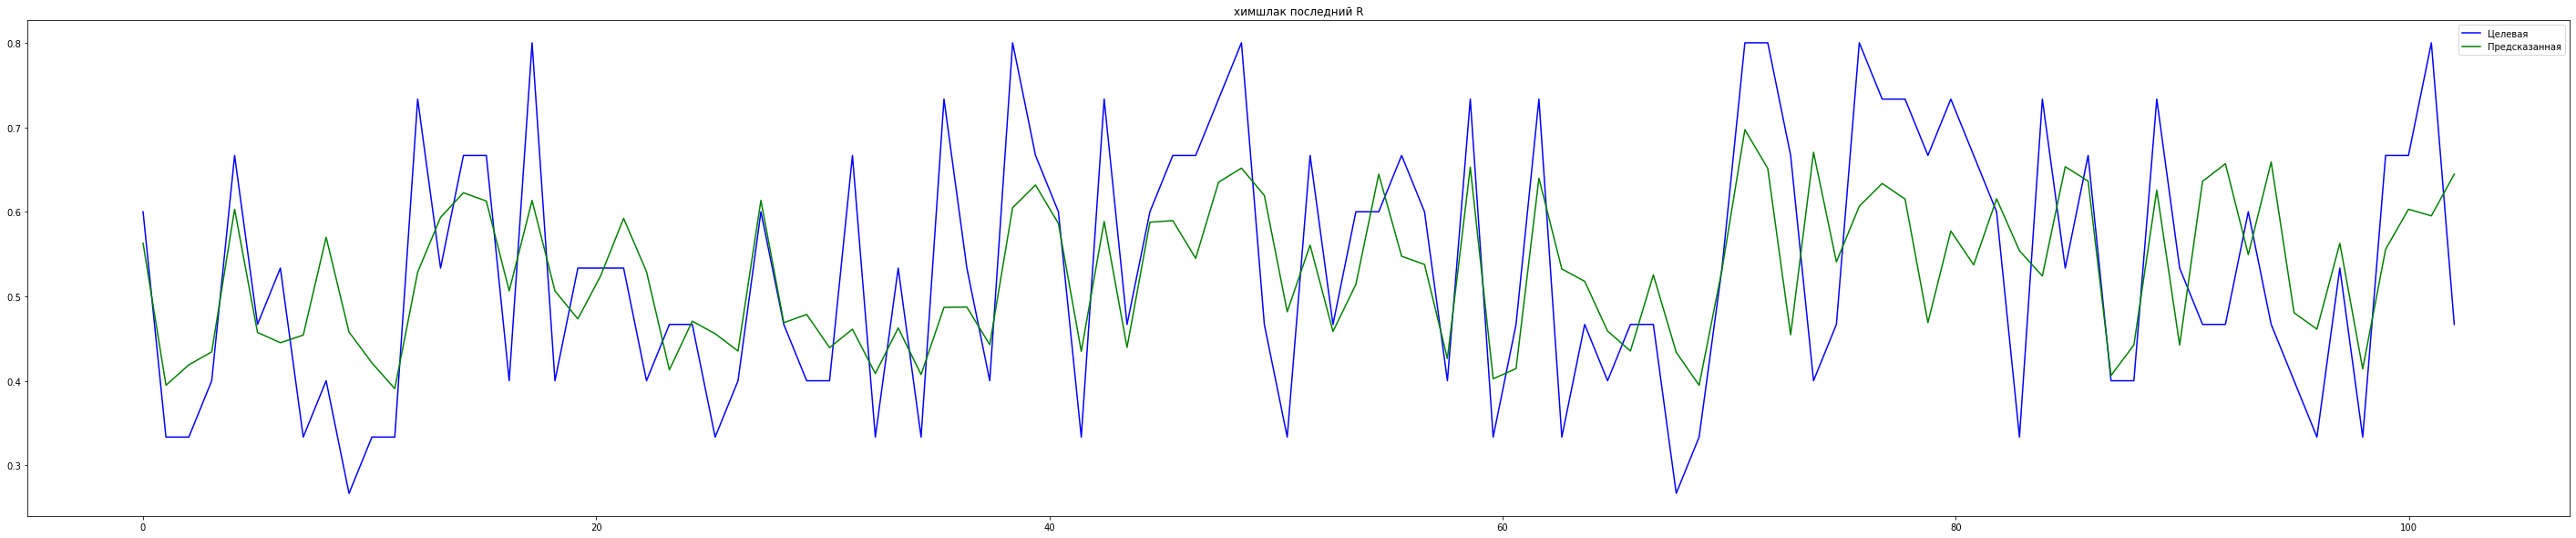

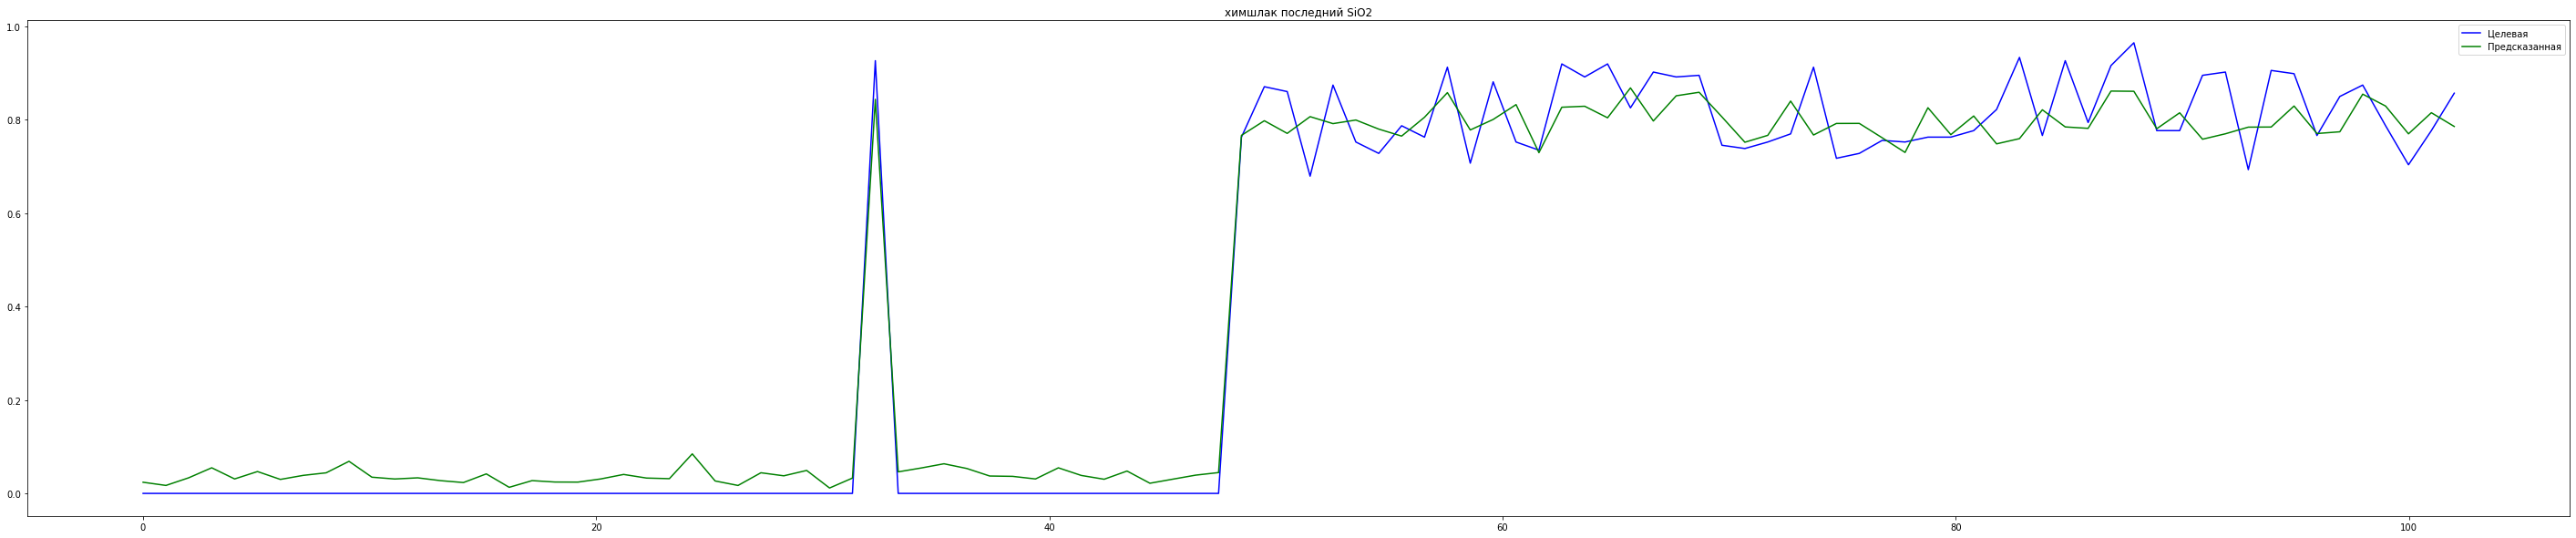

In [83]:
from subfunc import show_result

show_result(pred, target_test)

In [84]:
from sklearn.metrics import r2_score

r2_score(target_test, pred)

0.6660929082044267